In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
character_file = r'Dataset\MovieSummaries\character.metadata.tsv'
movie_file = r"Dataset\MovieSummaries\movie.metadata.tsv"
name_clusters_file = r'Dataset\MovieSummaries\name.clusters.txt' 
summaries_file = r'Dataset\MovieSummaries\plot_summaries.txt'
tvtropes_clusters_file = r'Dataset\MovieSummaries\tvtropes.clusters.txt'

In [3]:
column_names = [
    "wiki_movie_id",
    "freebase_movie_id",
    "release_date",
    "character_name",
    "actor_birth_date",
    "actor_gender",
    "actor_height_m",
    "actor_ethnicity_id",
    "actor_name",
    "actor_age_at_release",
    "character_actor_map_id",
    "character_id",
    "actor_id"
]
character = pd.read_csv(character_file, delimiter='\t', names = column_names)
character.head()

,wiki_movie_id,freebase_movie_id,release_date,character_name,actor_birth_date,actor_gender,actor_height_m,actor_ethnicity_id,actor_name,actor_age_at_release,character_actor_map_id,character_id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [60]:
character.groupby("actor_name")["character_name"]

(0.0, 30.0)

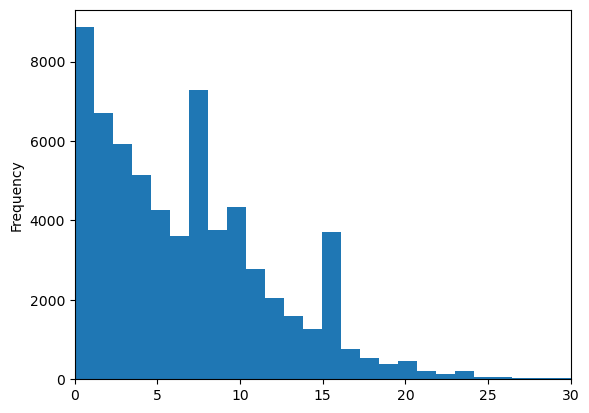

In [89]:
character.groupby("wiki_movie_id")["actor_name"].agg("count").plot.hist(bins=100)
plt.xlim(0,30)

In [4]:
character.freebase_movie_id.unique().size

64330

In [5]:
column_names = ['Wikipedia_movie_ID', 'Freebase_movie_ID', 'Movie_name', 'Movie_release_date', 'Movie_box_office_revenu', 'Movie_runtime', 'Movie_languages', 'Movie_countries', 'Movie_genres']
movie = pd.read_csv(movie_file, delimiter='\t', names = column_names)
movie['Movie_release_date_datetime']= pd.to_datetime(movie['Movie_release_date'], format='mixed', errors='coerce')
movie['Movie_release_year'] = movie['Movie_release_date_datetime'].dt.strftime('%Y')
movie.head()

,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenu,Movie_runtime,Movie_languages,Movie_countries,Movie_genres,Movie_release_date_datetime,Movie_release_year
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001-08-24,2001
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000-02-16,2000
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,"{""/m/05f_3"": ""Norwegian Language""}","{""/m/05b4w"": ""Norway""}","{""/m/0lsxr"": ""Crime Fiction"", ""/m/07s9rl0"": ""D...",1988-01-01,1988
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,"{""/m/02h40lc"": ""English Language""}","{""/m/07ssc"": ""United Kingdom""}","{""/m/01jfsb"": ""Thriller"", ""/m/0glj9q"": ""Erotic...",1987-01-01,1987
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,"{""/m/04306rv"": ""German Language""}","{""/m/0345h"": ""Germany""}","{""/m/07s9rl0"": ""Drama""}",1983-01-01,1983


In [6]:
movie.Freebase_movie_ID.unique().size

81741

In [7]:
summaries_movie = pd.read_csv(summaries_file, delimiter='\t', names=['movie_ID', 'movie_summary'])
summaries_movie.head()

,movie_ID,movie_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [73]:
summaries_movie.movie_summary.sample(1).

AttributeError: 'Series' object has no attribute 'value'

In [8]:
summaries_movie.movie_ID.unique().size

42303

In [9]:
name_clusters = pd.read_csv(name_clusters_file, delimiter='\t', names=['character_name', 'instance_code'])
name_clusters.head()

,character_name,instance_code
0,Stuart Little,/m/0k3w9c
1,Stuart Little,/m/0k3wcx
2,Stuart Little,/m/0k3wbn
3,John Doe,/m/0jyg35
4,John Doe,/m/0k2_zn


In [10]:
tvtropes = pd.read_csv(tvtropes_clusters_file, delimiter='\t', names=['character_type', 'instance_ref'])
tvtropes.head()

,character_type,instance_ref
0,absent_minded_professor,"{""char"": ""Professor Philip Brainard"", ""movie"":..."
1,absent_minded_professor,"{""char"": ""Professor Keenbean"", ""movie"": ""Richi..."
2,absent_minded_professor,"{""char"": ""Dr. Reinhardt Lane"", ""movie"": ""The S..."
3,absent_minded_professor,"{""char"": ""Dr. Harold Medford"", ""movie"": ""Them!..."
4,absent_minded_professor,"{""char"": ""Daniel Jackson"", ""movie"": ""Stargate""..."


In [67]:
tvtropes['instance_ref'][0]

'{"char": "Professor Philip Brainard", "movie": "Flubber", "id": "/m/0jy9q0", "actor": "Robin Williams"}'

In [11]:
tvtropes

'{"char": "Storm Shadow", "movie": "G.I. Joe: The Rise of Cobra", "id": "/m/052dfd5", "actor": "Lee Byung-Hun"}'

# Search easily for words in text

In [12]:
summaries_movie.head()

,movie_ID,movie_summary
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha..."
1,31186339,The nation of Panem consists of a wealthy Capi...
2,20663735,Poovalli Induchoodan is sentenced for six yea...
3,2231378,"The Lemon Drop Kid , a New York City swindler,..."
4,595909,Seventh-day Adventist Church pastor Michael Ch...


In [21]:
summaries_movie.shape

(42303, 2)

In [57]:
import re

# Sample DataFrame
my_df = summaries_movie.copy()

# List of words related to "smoking"
related_words = ["addiction", "smoke", "smoker", "smoking", "cigar", "cigarette", "tobacco", "nicotine", "ashtray"]

# Initialize the new columns
my_df['related_to_smoke'] = False
my_df['smoke_terms'] = pd.NA

# Iterate through the DataFrame
for index, row in my_df.iterrows():
    row_summary = row['movie_summary']

    # regular expression to search for related words
    pattern = r"\b(" + "|".join(related_words) + r")\b"

    # Search with regular expression
    matches = re.findall(pattern, row_summary, flags=re.IGNORECASE)

    # Update the DataFrame based on the matches
    if len(matches) > 0:
        my_df.at[index, 'related_to_smoke'] = True
        my_df.at[index, 'smoke_terms'] = ','.join(matches)
        #print(f"Related words found in the text: {matches}")

In [58]:
my_df

,movie_ID,movie_summary,related_to_smoke,smoke_terms
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",False,NaN
1,31186339,The nation of Panem consists of a wealthy Capi...,False,NaN
2,20663735,Poovalli Induchoodan is sentenced for six yea...,False,NaN
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",False,NaN
4,595909,Seventh-day Adventist Church pastor Michael Ch...,False,NaN
...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",False,NaN
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",False,NaN
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,False,NaN
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",False,NaN


In [49]:
id_year = movie[['Wikipedia_movie_ID', 'Movie_release_year']]
id_year

,Wikipedia_movie_ID,Movie_release_year
0,975900,2001
1,3196793,2000
2,28463795,1988
3,9363483,1987
4,261236,1983
...,...,...
81736,35228177,2011
81737,34980460,2011
81738,9971909,1972
81739,913762,1992


In [50]:
my_df = pd.merge(my_df, id_year, how='left', left_on='movie_ID', right_on='Wikipedia_movie_ID')
my_df

,movie_ID,movie_summary,related_to_smoke,smoke_terms,Wikipedia_movie_ID,Movie_release_year
0,23890098,"Shlykov, a hard-working taxi driver and Lyosha...",False,NaN,23890098.0,1990
1,31186339,The nation of Panem consists of a wealthy Capi...,False,NaN,31186339.0,2012
2,20663735,Poovalli Induchoodan is sentenced for six yea...,False,NaN,20663735.0,2000
3,2231378,"The Lemon Drop Kid , a New York City swindler,...",False,NaN,2231378.0,1951
4,595909,Seventh-day Adventist Church pastor Michael Ch...,False,NaN,595909.0,1988
...,...,...,...,...,...,...
42298,34808485,"The story is about Reema , a young Muslim scho...",False,NaN,34808485.0,2012
42299,1096473,"In 1928 Hollywood, director Leo Andreyev look...",False,NaN,1096473.0,1928
42300,35102018,American Luthier focuses on Randy Parsons’ tra...,False,NaN,35102018.0,2011
42301,8628195,"Abdur Rehman Khan , a middle-aged dry fruit se...",False,NaN,8628195.0,1961


In [51]:
result = my_df.groupby('Movie_release_year')['related_to_smoke'].agg(['sum', 'count'])

In [52]:
result

,sum,count
Movie_release_year,,
1893,0,1
1894,0,2
1895,0,9
1896,1,6
1897,0,4
...,...,...
2010,40,1374
2011,32,1162
2012,12,662


In [53]:
result['proportion'] = result["sum"]/result["count"]

<Axes: xlabel='Movie_release_year'>

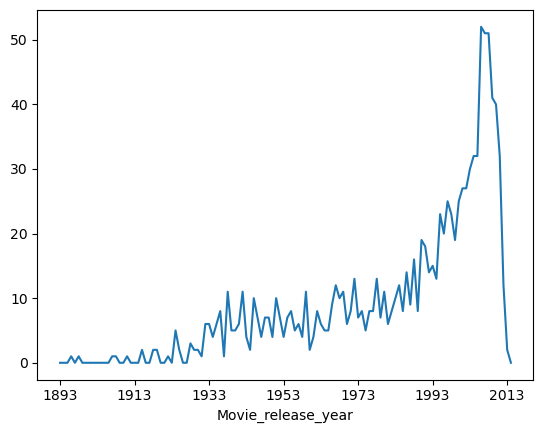

In [54]:
result['sum'].plot()

<Axes: xlabel='Movie_release_year'>

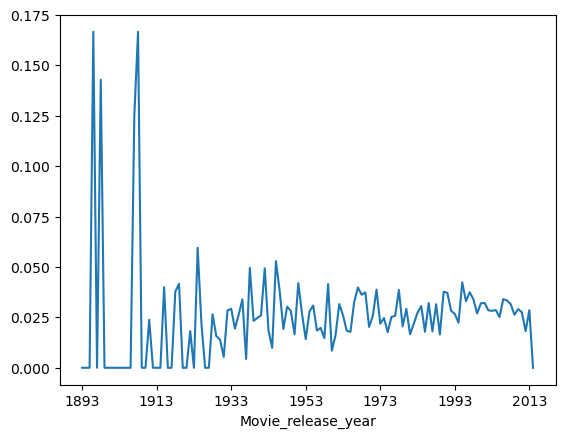

In [55]:
result['proportion'].plot()

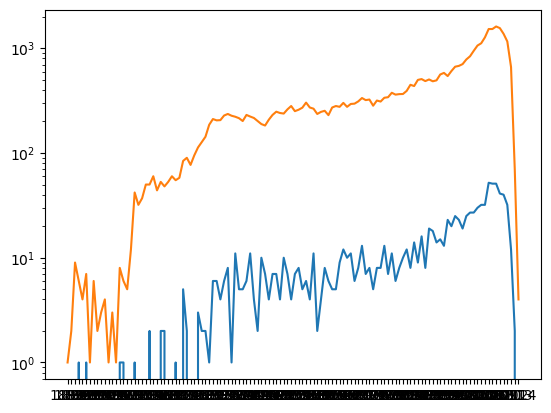

In [56]:
import matplotlib.pyplot as plt

plt.semilogy(result['sum'])
plt.semilogy(result['count'])

In [34]:
result['sum'].values

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  1,  0,  0,  0,  2,  0,  0,  2,  1,  0,  0,  0,  0,  1,  2,  0,
        0,  3,  1,  1,  1,  3,  5,  1,  4,  5,  0,  8,  1,  4,  5,  6,  2,
        2,  6,  6,  1,  6,  3,  1,  8,  4,  3,  3,  4,  1,  4,  1,  7,  1,
        4,  4,  1,  3,  2,  7,  7,  5,  7,  2,  6,  8,  3,  4,  1,  2,  3,
        7,  5,  6,  2,  4,  6,  9,  4,  7,  5, 11,  5, 10,  9,  6,  9,  9,
        7, 11, 11, 11, 14, 17, 21, 17, 18, 21, 14, 21, 28, 23, 22, 16, 14,
        4,  0,  0], dtype=int64)